# Ensemble Regression Method


In [6]:
#Boston Housing Dataset: Load the boston dataset.
from sklearn.datasets import load_boston

boston = load_boston()


#Creating feature and target arrays
X, y = boston.data, boston.target
columns = boston.feature_names

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=False).fit(X)
scaler.transform(X)


# TRAIN-TEST split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=42)


## Random forest


In [10]:
#DEFINE YOUR REGRESSOR and THE PARAMETERS GRID
from sklearn.ensemble import RandomForestRegressor 
import numpy as np

regressor = RandomForestRegressor()
parameters = {"n_estimators":[5,10,100,200], "criterion": ['mse'], "max_depth":[3,4], 
              "min_samples_leaf": [10,5], "random_state" : [42]}

#DEFINE YOUR GRIDSEARCH 
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(regressor, parameters, cv=3) #with no params it reduces to a CV

gs = gs.fit(X_train,y_train)

#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#Returns the coefficient of determination R^2 of the prediction.
#Explained variance score: 1 is perfect prediction
gs.score(X_test, y_test)

***GRIDSEARCH RESULTS***
Best score: 0.773431 using {'criterion': 'mse', 'max_depth': 4, 'min_samples_leaf': 5, 'n_estimators': 200, 'random_state': 42}
0.733134 (0.046415) with: {'criterion': 'mse', 'max_depth': 3, 'min_samples_leaf': 10, 'n_estimators': 5, 'random_state': 42}
0.749350 (0.047250) with: {'criterion': 'mse', 'max_depth': 3, 'min_samples_leaf': 10, 'n_estimators': 10, 'random_state': 42}
0.744404 (0.035020) with: {'criterion': 'mse', 'max_depth': 3, 'min_samples_leaf': 10, 'n_estimators': 100, 'random_state': 42}
0.746909 (0.034949) with: {'criterion': 'mse', 'max_depth': 3, 'min_samples_leaf': 10, 'n_estimators': 200, 'random_state': 42}
0.738029 (0.035272) with: {'criterion': 'mse', 'max_depth': 3, 'min_samples_leaf': 5, 'n_estimators': 5, 'random_state': 42}
0.754844 (0.047871) with: {'criterion': 'mse', 'max_depth': 3, 'min_samples_leaf': 5, 'n_estimators': 10, 'random_state': 42}
0.759080 (0.044313) with: {'criterion': 'mse', 'max_depth': 3, 'min_samples_leaf': 5, '

0.8031205373066841

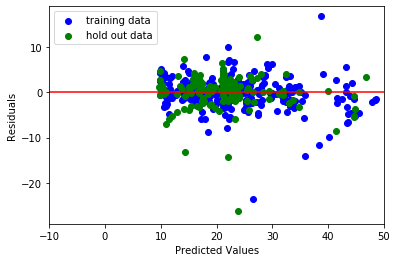

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(gs.predict(X_train),gs.predict(X_train)-y_train, c="b", label="training data")
plt.scatter(gs.predict(X_test),gs.predict(X_test)-y_test, c="g", label="hold out data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=50, color="r")
plt.xlim([-10,50])
plt.show()

In [13]:
from sklearn import metrics

print("MAE train: ", metrics.mean_absolute_error(y_train, gs.predict(X_train))) 
print("MSE train: ",metrics.mean_squared_error(y_train, gs.predict(X_train)))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, gs.predict(X_train))))
print("r2: ",np.sqrt(metrics.r2_score(y_train, gs.predict(X_train))))

print("MAE test: ", metrics.mean_absolute_error(y_test, gs.predict(X_test))) 
print("MSE test: ",metrics.mean_squared_error(y_test, gs.predict(X_test)))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, gs.predict(X_test))))
print("r2: ",np.sqrt(metrics.r2_score(y_test, gs.predict(X_test))))

MAE train:  2.1454168017340858
MSE train:  10.167855953029287
RMSE train:  3.1887075678132177
r2:  0.9403829888709508
MAE test:  2.4181212398230074
MSE test:  14.67009821901736
RMSE test:  3.830156422264939
r2:  0.896169926580157


In [ ]:
# We can export as a figure but we must install graphviz https://graphviz.gitlab.io/download/

# Install a conda package in the current Jupyter kernel
#import sys
#!conda install --yes --prefix {sys.prefix} graphviz
#!{sys.executable} -m pip install graphviz

from sklearn import tree
tree.export_graphviz(gs.best_estimator_.estimators_[0], out_file='tree_from_forest.dot',feature_names=columns.tolist(),max_depth=4)

In [ ]:
!dot -Tpng tree_from_forest.dot -o tree_from_forest.png -Gdpi=600

In [ ]:
from IPython.display import Image
Image(filename = 'tree_from_forest.png')

## AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

base=SVC(kernel='linear')

classifier =AdaBoostClassifier(n_estimators=100, base_estimator=base, learning_rate=0.1)

In [15]:
from sklearn.ensemble import AdaBoostRegressor

adaboost = AdaBoostRegressor(random_state=0, n_estimators=100)
adaboost.fit(X_train, y_train)

y_train_pred=adaboost.predict(X_train)
y_pred=adaboost.predict(X_test)


In [10]:
from sklearn import metrics

print("MAE train: ", metrics.mean_absolute_error(y_train, y_train_pred)) 
print("MSE train: ",metrics.mean_squared_error(y_train, y_train_pred))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("r2: ",np.sqrt(metrics.r2_score(y_train, y_train_pred)))

print("MAE test: ", metrics.mean_absolute_error(y_test,y_pred)) 
print("MSE test: ",metrics.mean_squared_error(y_test, y_pred))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("r2: ",np.sqrt(metrics.r2_score(y_test, y_pred)))

NameError: name 'y_train_pred' is not defined

In [16]:
from sklearn.ensemble import AdaBoostClassifier


regressor = AdaBoostRegressor() # base_estimator=DecisionTreeRegressor(max_depth=3)
parameters = {"n_estimators":[5,10,100], "learning_rate":[0.1,0.5,1,2], 
              "loss": ['linear', 'square'], "random_state" : [0]}

#DEFINE YOUR GRIDSEARCH 
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(regressor, parameters, cv=3) 

gs = gs.fit(X_train,y_train)


#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#Returns the coefficient of determination R^2 of the prediction.
#Explained variance score: 1 is perfect prediction
gs.score(X_test, y_test)

***GRIDSEARCH RESULTS***
Best score: 0.774452 using {'learning_rate': 2, 'loss': 'linear', 'n_estimators': 100, 'random_state': 0}
0.713518 (0.028654) with: {'learning_rate': 0.1, 'loss': 'linear', 'n_estimators': 5, 'random_state': 0}
0.717005 (0.048154) with: {'learning_rate': 0.1, 'loss': 'linear', 'n_estimators': 10, 'random_state': 0}
0.759994 (0.040874) with: {'learning_rate': 0.1, 'loss': 'linear', 'n_estimators': 100, 'random_state': 0}
0.722939 (0.023017) with: {'learning_rate': 0.1, 'loss': 'square', 'n_estimators': 5, 'random_state': 0}
0.744488 (0.044324) with: {'learning_rate': 0.1, 'loss': 'square', 'n_estimators': 10, 'random_state': 0}
0.752640 (0.042670) with: {'learning_rate': 0.1, 'loss': 'square', 'n_estimators': 100, 'random_state': 0}
0.737555 (0.060176) with: {'learning_rate': 0.5, 'loss': 'linear', 'n_estimators': 5, 'random_state': 0}
0.740005 (0.063464) with: {'learning_rate': 0.5, 'loss': 'linear', 'n_estimators': 10, 'random_state': 0}
0.760458 (0.056186) wi

0.8152880840444166

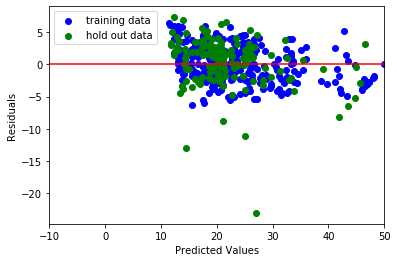

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(gs.predict(X_train),gs.predict(X_train)-y_train, c="b", label="training data")
plt.scatter(gs.predict(X_test),gs.predict(X_test)-y_test, c="g", label="hold out data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=50, color="r")
plt.xlim([-10,50])
plt.show()

In [18]:
from sklearn import metrics

print("MAE train: ", metrics.mean_absolute_error(y_train, gs.predict(X_train))) 
print("MSE train: ",metrics.mean_squared_error(y_train, gs.predict(X_train)))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, gs.predict(X_train))))
print("r2: ",np.sqrt(metrics.r2_score(y_train, gs.predict(X_train))))

print("MAE test: ", metrics.mean_absolute_error(y_test, gs.predict(X_test))) 
print("MSE test: ",metrics.mean_squared_error(y_test, gs.predict(X_test)))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, gs.predict(X_test))))
print("r2: ",np.sqrt(metrics.r2_score(y_test, gs.predict(X_test))))

MAE train:  2.2657806641518388
MSE train:  7.409321655915248
RMSE train:  2.7220069169484575
r2:  0.9569242643185858
MAE test:  2.616906667750007
MSE test:  13.763456646122217
RMSE test:  3.7099132936124284
r2:  0.9029330451613877


# Gradient Boosting

$$ \hat{y_i} = F_M(x_i) = \sum_{m=1}^{M} h_m(x_i) $$
$$ F_m(x) = F_{m-1}(x) + h_m(x)$$
$$ h_m =  \arg\min_{h} L_m = \arg\min_{h} \sum_{i=1}^{n}
l(y_i, F_{m-1}(x_i) + h(x_i))$$

$$ F_m(x) = F_{m-1}(x) + \nu h_m(x)$$



In [22]:
from sklearn.ensemble import GradientBoostingRegressor

regressor = GradientBoostingRegressor() # base_estimator=DecisionTreeRegressor(max_depth=3)
parameters = {"n_estimators":[5,10], "learning_rate":[0.1,0.5,1,2], 
              "loss": ['ls', 'lad'], "random_state" : [0] ,
             "max_depth":[1,2]}

#DEFINE YOUR GRIDSEARCH 
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(regressor, parameters, cv=3) 

gs = gs.fit(X_train,y_train)


#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#Returns the coefficient of determination R^2 of the prediction.
#Explained variance score: 1 is perfect prediction
gs.score(X_test, y_test)

***GRIDSEARCH RESULTS***
Best score: 0.771771 using {'learning_rate': 0.5, 'loss': 'ls', 'max_depth': 2, 'n_estimators': 10, 'random_state': 0}
0.300946 (0.015869) with: {'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 1, 'n_estimators': 5, 'random_state': 0}
0.476527 (0.012960) with: {'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 1, 'n_estimators': 10, 'random_state': 0}
0.424269 (0.021106) with: {'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 2, 'n_estimators': 5, 'random_state': 0}
0.606452 (0.028036) with: {'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 2, 'n_estimators': 10, 'random_state': 0}
0.206463 (0.018392) with: {'learning_rate': 0.1, 'loss': 'lad', 'max_depth': 1, 'n_estimators': 5, 'random_state': 0}
0.364776 (0.015849) with: {'learning_rate': 0.1, 'loss': 'lad', 'max_depth': 1, 'n_estimators': 10, 'random_state': 0}
0.344188 (0.024721) with: {'learning_rate': 0.1, 'loss': 'lad', 'max_depth': 2, 'n_estimators': 5, 'random_state': 0}
0.539218 (0.016095) with: {'lea

0.7991946683628244

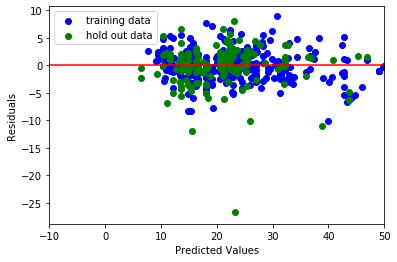

In [23]:

%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(gs.predict(X_train),gs.predict(X_train)-y_train, c="b", label="training data")
plt.scatter(gs.predict(X_test),gs.predict(X_test)-y_test, c="g", label="hold out data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=50, color="r")
plt.xlim([-10,50])
plt.show()

In [24]:
from sklearn import metrics

print("MAE train: ", metrics.mean_absolute_error(y_train, gs.predict(X_train))) 
print("MSE train: ",metrics.mean_squared_error(y_train, gs.predict(X_train)))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, gs.predict(X_train))))
print("r2: ",np.sqrt(metrics.r2_score(y_train, gs.predict(X_train))))

print("MAE test: ", metrics.mean_absolute_error(y_test, gs.predict(X_test))) 
print("MSE test: ",metrics.mean_squared_error(y_test, gs.predict(X_test)))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, gs.predict(X_test))))
print("r2: ",np.sqrt(metrics.r2_score(y_test, gs.predict(X_test))))

MAE train:  2.0651627443973144
MSE train:  7.295283069326774
RMSE train:  2.700978168983743
r2:  0.9576019351372177
MAE test:  2.579578999809092
MSE test:  14.962626866818098
RMSE test:  3.868155486380828
r2:  0.8939768835729615
